# Eucalc
**Author**: H. Passe

Eucalc is a C++ / Python library that implements algorithms to compute hybrid transforms, Radon transform and Euler characteristic transform on cubical complexes. In this notebook we aim to give details on the framework of both the transforms and our library. ***refer to paper in some way***.

In [3]:
# We first import common python libraries
import numpy as np
import matplotlib.pyplot as plt
# We also import our library
import eucalc

## Cubical complexes

First we define a *cube* of $\mathbb{R}^n$ as a subset $[a_1,b_1]\times\dots\times [a_n,b_n] \subseteq \mathbb{R}^n$ such that if $a_i \neq b_i$ and $a_j \neq b_j$ then $b_i - a_i = b_j - a_j$. A cubical complex is simply a finite collection of cubes. We call the dimension of a cell the number of indices such that $b_i \neq a_i$.

We illustrate this definition with an example plot.

[]

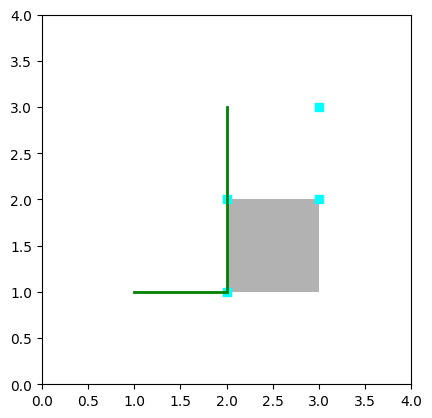

In [4]:
# Setting up the plot
fig, ax = plt.subplots()
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_box_aspect(1)

# Adding 2-dimensional cell
ax.add_patch(plt.Rectangle((2, 1), 1, 1, facecolor="black",alpha=0.3))
# Adding some 1 dimensional cells
oneDimCellsX = [[1,2],[2,2],[2,2]]
oneDimCellsY = [[1,1],[1,2],[2,3]]
for i in range(len(oneDimCellsX)):
    ax.plot(oneDimCellsX[i],oneDimCellsY[i],'g',linewidth=2)
    
# Adding zero-dimensional cells
ax.scatter([2,2,3,3],[1,2,2,3],c='cyan',marker='s')

# Plotting
plt.plot()

In grey we have a cube of dimension two, $[2,3]\times[1,2]$. In green cubes of dimension one, $[1,2]\times[1,1]$, $[2,2]\times[1,2]$ and $[2,2]\times[2,3]$. And in blue cubes of dimension zero, $[2,2]\times[1,1]$, $[2,2]\times[2,2]$, $[3,3]\times[2,2]$ and $[3,3]\times[3,3]$.

So we have a way to reprensent binary images as cubical complexes by replacing each white pixel by a 2 dimensional cell along with its contour. For instance

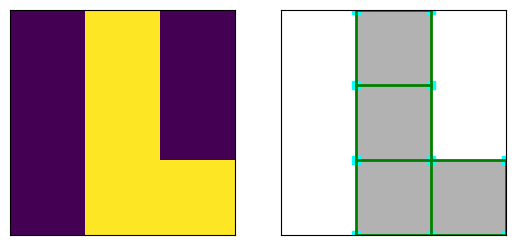

In [34]:
img = np.array([[0,1,0],[0,1,0],[0,1,1]])
fig, axs = plt.subplots(1, 2, subplot_kw={'xticks': [], 'yticks': []})
axs[1].set_xlim(0, 3)
axs[1].set_ylim(0, 3)
axs[1].set_box_aspect(1)

# The image
axs[0].imshow(img)

# The complex
axs[1].add_patch(plt.Rectangle((1, 1), 1, 1, facecolor="black",alpha=0.3))
axs[1].add_patch(plt.Rectangle((1, 0), 1, 1, facecolor="black",alpha=0.3))
axs[1].add_patch(plt.Rectangle((1, 2), 1, 1, facecolor="black",alpha=0.3))
axs[1].add_patch(plt.Rectangle((2, 0), 1, 1, facecolor="black",alpha=0.3))
oneDimCellsX = [[1,1],[2,2],[1,2],[1,2],[1,2],[1,2],[2,3],[2,3],[3,3]]
oneDimCellsY = [[0,3],[0,3],[0,0],[1,1],[2,2],[3,3],[0,0],[1,1],[0,1]]
for i in range(len(oneDimCellsX)):
    axs[1].plot(oneDimCellsX[i],oneDimCellsY[i],'g',linewidth=2)
axs[1].scatter([1,1,1,1,2,2,2,2,3,3],[0,1,2,3,0,1,2,3,0,1],c='cyan',marker='s')

This also works for 3d scans

Cubical complexes can also be valued, it suffices to associate a value to each cell of it. We call this valuation the *filtration* of the complex. The question that arises is : Wich value should be associated to lower dimensional cells between multiple two-dimensional ones that have different values ? For instance, on the following plot, green cell can be either 1 or 2 and blue cell can be 0, 1, 2 or 3.

Text(2.45, 2.45, '3')

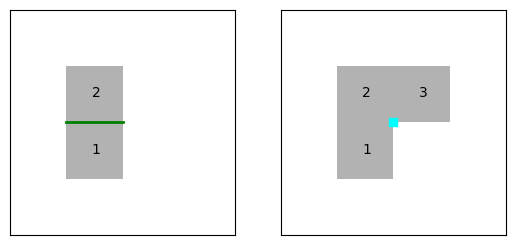

In [59]:
fig, axs = plt.subplots(1, 2, subplot_kw={'xticks': [], 'yticks': []})
for i in [0,1]:
    axs[i].set_xlim(0, 4)
    axs[i].set_ylim(0, 4)
    axs[i].set_box_aspect(1)

# Left image
axs[0].add_patch(plt.Rectangle((1, 1), 1, 1, facecolor="black",alpha=0.3))
axs[0].add_patch(plt.Rectangle((1, 2), 1, 1, facecolor="black",alpha=0.3))
axs[0].plot([1,2],[2,2],'g',linewidth=2)
axs[0].text(1.45, 1.45, '1')
axs[0].text(1.45, 2.45, '2')

# Left image
axs[1].add_patch(plt.Rectangle((1, 1), 1, 1, facecolor="black",alpha=0.3))
axs[1].add_patch(plt.Rectangle((1, 2), 1, 1, facecolor="black",alpha=0.3))
axs[1].add_patch(plt.Rectangle((2, 2), 1, 1, facecolor="black",alpha=0.3))
axs[1].scatter([2],[2],c='cyan',marker='s')
axs[1].text(1.45, 1.45, '1')
axs[1].text(1.45, 2.45, '2')
axs[1].text(2.45, 2.45, '3')

To chose decide which filtration values should be given to lower dimension cells, we have two possibilities in Euclac *lower star filatration* and *upper star filtration*. The first attributes to the cell the minimal filtration value of all of its higher dimensional neighbouring cells. The last attributes the max.

In our previous example :
For the lower star filtration the green cell would be given value 1 and the blue cell value 0.
For the upper star filtration the green cell would be given value 2 and the blue cell value 3.

## Cubical complexes in Eucalc

Everything that we saw above is implemented in Eucalc. A cubical complex can be created using a numpy array representing the value of the higher dimensional cells. The dimension is automatically parsed from the array and the lower dimensional cells are computed using upper star or lower star filtration.

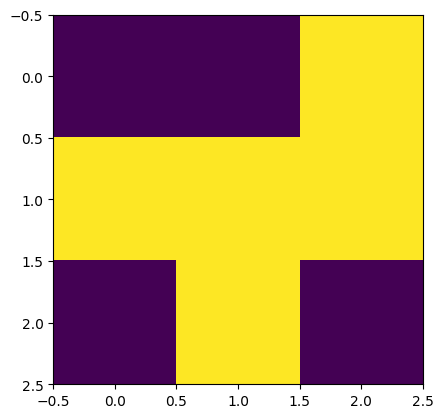

Filtration : 
[0, 0, 0, 0, 0, 1, 1, ]
0, 0, 0, 0, 0, 1, 1, ]
0, 0, 0, 0, 0, 1, 1, ]
1, 1, 1, 1, 1, 1, 1, ]
0, 0, 0, 1, 0, 0, 0, ]
0, 0, 0, 1, 0, 0, 0, ]
0, 0, 0, 1, 0, 0, 0, ]
]


In [80]:
img = np.array([[0,1,0],[1,1,1],[0,0,1]])

# Because indexing are different in Eucalc and Numpy are different we flip
# the image so it fits the filtration printed, it has no impact on the computations.
plt.imshow(np.flip(img,axis=0))
plt.show()

# Creating the compelx using Eucalc
cplx = eucalc.EmbeddedComplex(img)
cplx.print_filtration()